In [1]:
import pandas as pd
import spacy
nlp = spacy.load('en')

In [2]:
base_path = "C:\\Users\\vbabu\\MStar\\Datasets\\BBC-Dataset-News-Classification\\dataset\\"
train_path = base_path+"dataset.csv"
dataset = pd.read_csv(train_path, encoding = "ISO-8859-1")

In [3]:
dataset.head()

,news,type
0,China had role in Yukos split-up\r\n \r\n Chin...,business
1,Oil rebounds from weather effect\r\n \r\n Oil ...,business
2,Indonesia 'declines debt freeze'\r\n \r\n Indo...,business
3,$1m payoff for former Shell boss\r\n \r\n Shel...,business
4,US bank in $515m SEC settlement\r\n \r\n Five ...,business


In [4]:
doc1 = nlp('dog')
doc2 = nlp('cat')
doc1.similarity(doc1)

1.0

In [5]:
doc3 = nlp('smart')
doc4 = nlp('clever')
doc3.similarity(doc4)

0.8051824832875271

In [6]:
doc5 = nlp('smart')
doc6 = nlp('smart')
doc5.similarity(doc6)

1.0

In [7]:
ex1 = nlp ('wolf dog cat bird fish')
for tkn1 in ex1:
    for tkn2 in ex1:
        print((tkn1.text, tkn2.text), 'similarity=>', tkn1.similarity(tkn2))

('wolf', 'wolf') similarity=> 1.0
('wolf', 'dog') similarity=> 0.5234998
('wolf', 'cat') similarity=> 0.30953422
('wolf', 'bird') similarity=> 0.52796584
('wolf', 'fish') similarity=> 0.05131726
('dog', 'wolf') similarity=> 0.5234998
('dog', 'dog') similarity=> 1.0
('dog', 'cat') similarity=> 0.6250718
('dog', 'bird') similarity=> 0.4794653
('dog', 'fish') similarity=> 0.32915172
('cat', 'wolf') similarity=> 0.30953422
('cat', 'dog') similarity=> 0.6250718
('cat', 'cat') similarity=> 1.0
('cat', 'bird') similarity=> 0.4474157
('cat', 'fish') similarity=> 0.447517
('bird', 'wolf') similarity=> 0.52796584
('bird', 'dog') similarity=> 0.4794653
('bird', 'cat') similarity=> 0.4474157
('bird', 'bird') similarity=> 1.0
('bird', 'fish') similarity=> 0.35412994
('fish', 'wolf') similarity=> 0.05131726
('fish', 'dog') similarity=> 0.32915172
('fish', 'cat') similarity=> 0.447517
('fish', 'bird') similarity=> 0.35412994
('fish', 'fish') similarity=> 1.0


In [10]:
# creating pandas data frame 

sim_list = [(tkn1.text, tkn2.text, tkn1.similarity(tkn2)) for tkn2 in ex1 for tkn1 in ex1]

In [12]:
data = pd.DataFrame(sim_list, columns=['tkn1', 'tkn2', 'similarity'])
data.head()

,tkn1,tkn2,similarity
0,wolf,wolf,1.000000
1,dog,wolf,0.523500
2,cat,wolf,0.309534
3,bird,wolf,0.527966
4,fish,wolf,0.051317


In [19]:
df = data.replace({'fish':0, 'dog':1, 'cat':2,'wolf': 3, 'bird':4})


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

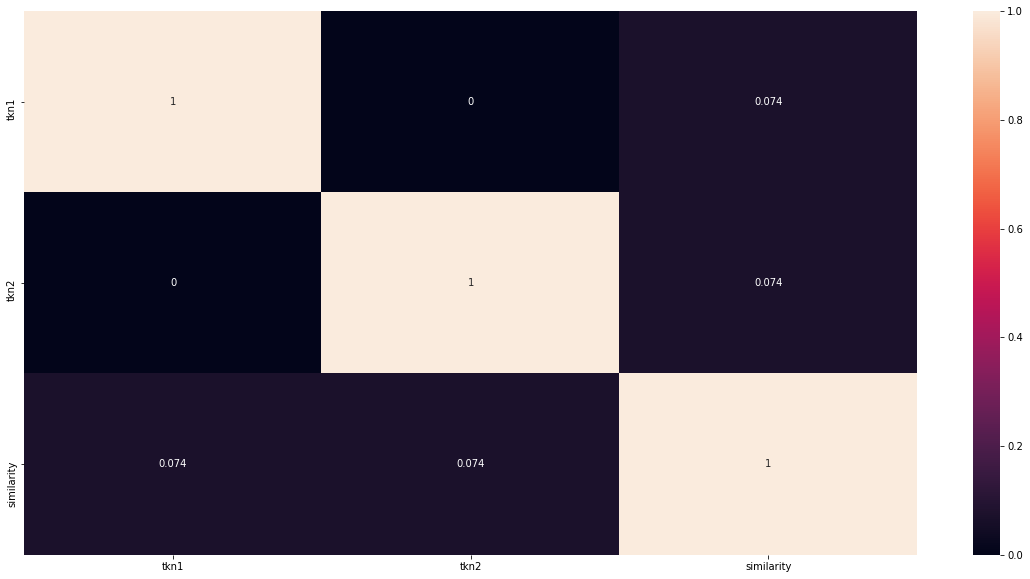

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)
plt.show()